In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import cross_val_score, train_test_split

In [2]:
def rmsle(h, y):
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [3]:
train_data = pd.read_csv('Datasets/train.csv')

test_data = pd.read_csv('Datasets/test.csv')

In [4]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,20-01-2011 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,20-01-2011 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,20-01-2011 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,20-01-2011 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,20-01-2011 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [7]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


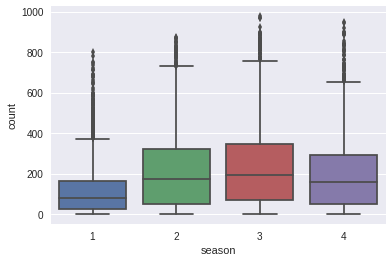

In [8]:
sns.boxplot(y=train_data['count'], x=train_data['season'])

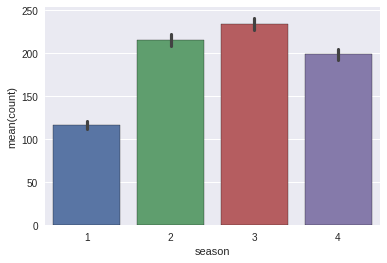

In [9]:
sns.barplot(x=train_data['season'], y=train_data['count'])

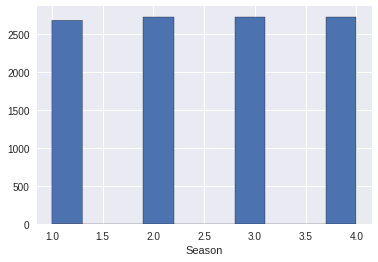

In [10]:
plt.hist('season', data=train_data)
plt.xlabel('Season')

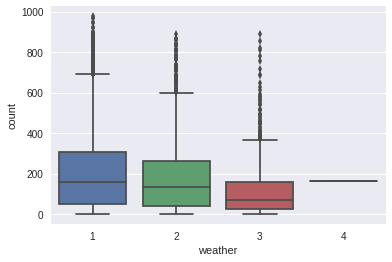

In [11]:
sns.boxplot(y=train_data['count'], x=train_data['weather'])

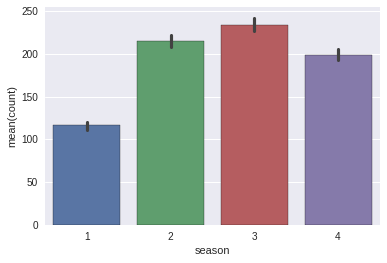

In [12]:
sns.barplot(y=train_data['count'], x=train_data['season'])

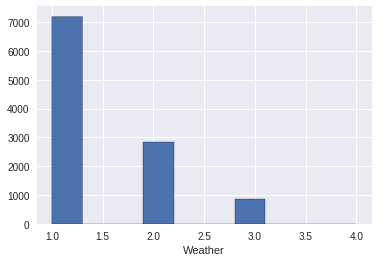

In [13]:
plt.hist('weather', data=train_data)
plt.xlabel('Weather')

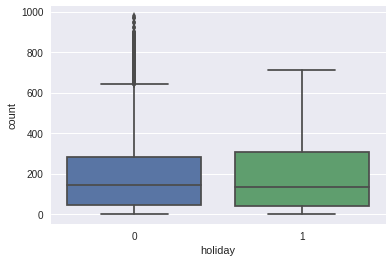

In [14]:
sns.boxplot(y=train_data['count'], x=train_data['holiday'])

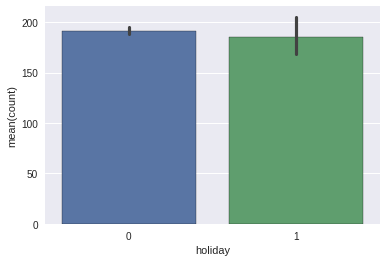

In [15]:
sns.barplot(y=train_data['count'], x=train_data['holiday'])

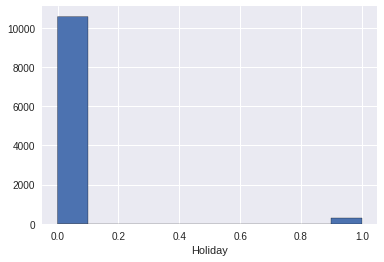

In [16]:
plt.hist('holiday', data=train_data)
plt.xlabel('Holiday')

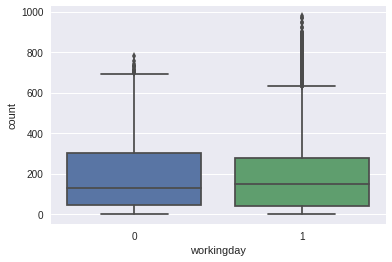

In [17]:
sns.boxplot(y=train_data['count'], x=train_data['workingday'])

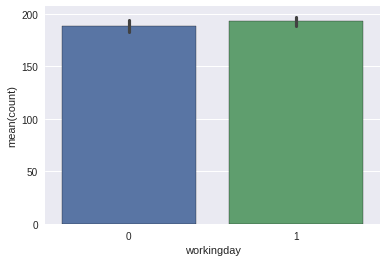

In [18]:
sns.barplot(y=train_data['count'], x=train_data['workingday'])

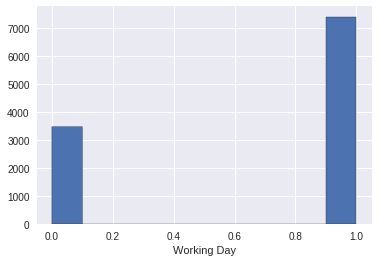

In [19]:
plt.hist('workingday', data=train_data)
plt.xlabel('Working Day')

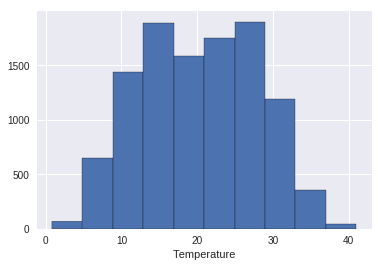

In [20]:
plt.hist('temp', data=train_data)
plt.xlabel('Temperature')

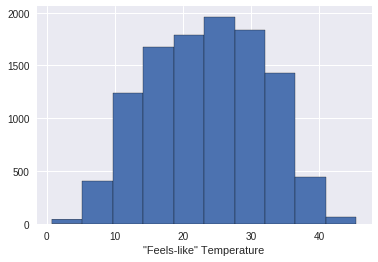

In [21]:
plt.hist('atemp', data=train_data)
plt.xlabel('"Feels-like" Temperature')

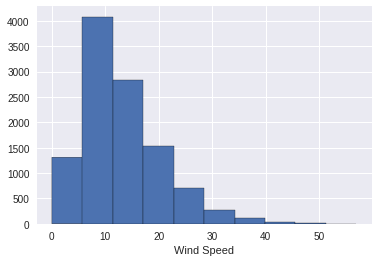

In [22]:
plt.hist('windspeed', data=train_data)
plt.xlabel('Wind Speed')

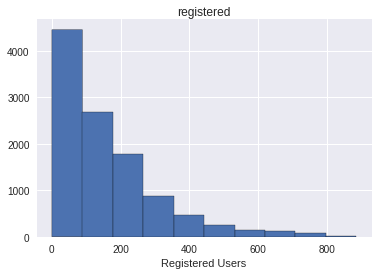

In [23]:
train_data.hist('registered')
plt.xlabel('Registered Users')

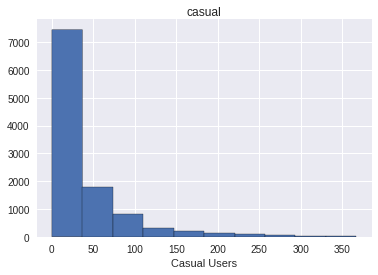

In [24]:
train_data.hist('casual')
plt.xlabel('Casual Users')

In [25]:
def extract_hour(t):
    t = pd.to_datetime(t, format='%d-%m-%Y %H:%M:%S')
    return t.hour

In [60]:
train_data['time_hour'] = train_data['datetime'].apply(extract_hour)
test_data['time_hour'] = test_data['datetime'].apply(extract_hour)

In [28]:
registered_per_hour = train_data.groupby('time_hour')['registered']
casual_per_hour = train_data.groupby('time_hour')['casual']

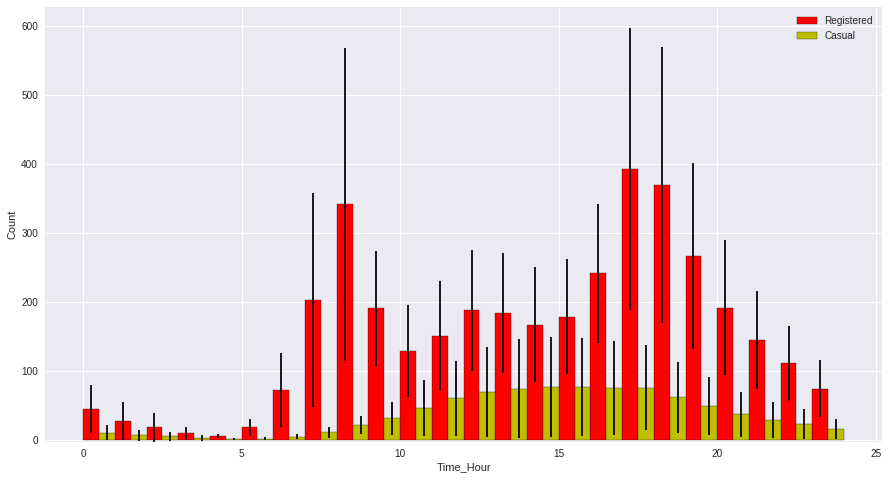

In [29]:
x_loc = np.arange(len(train_data['time_hour'].unique()))
width = 0.5

fig, ax = plt.subplots()

rects1 = ax.bar(x_loc, np.array(registered_per_hour.mean()), width, color='r', yerr=np.array(registered_per_hour.std()))
rects2 = ax.bar(x_loc+width, np.array(casual_per_hour.mean()), width, color='y', yerr=np.array(casual_per_hour.std()))

ax.set_ylabel('Count')
ax.set_xlabel('Time_Hour')

ax.legend((rects1[0], rects2[0]), ('Registered', 'Casual'))

fig.set_figheight(8)
fig.set_figwidth(15)

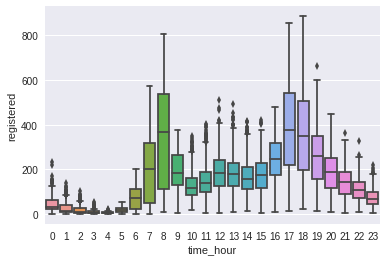

In [30]:
sns.boxplot(y=train_data['registered'], x=train_data['time_hour'])

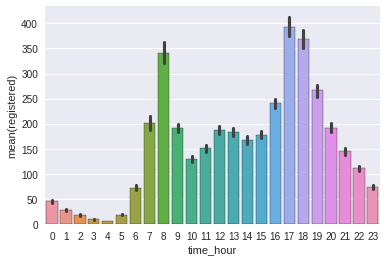

In [31]:
sns.barplot(y=train_data['registered'], x=train_data['time_hour'])

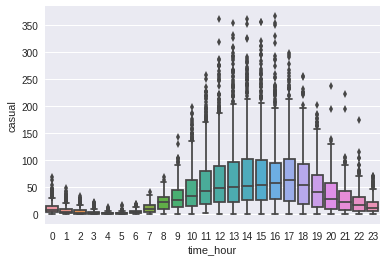

In [32]:
sns.boxplot(y=train_data['casual'], x=train_data['time_hour'])

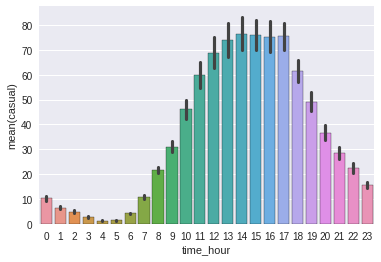

In [33]:
sns.barplot(y=train_data['casual'], x=train_data['time_hour'])

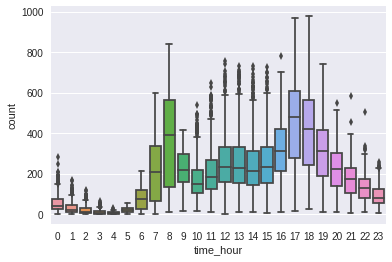

In [34]:
sns.boxplot(y=train_data['count'], x=train_data['time_hour'])

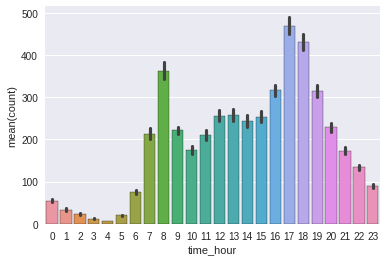

In [35]:
sns.barplot(y=train_data['count'], x=train_data['time_hour'])

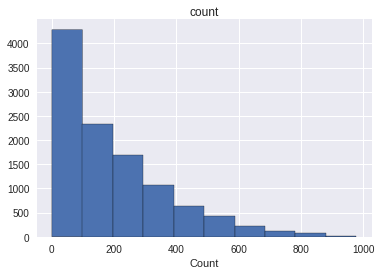

In [36]:
train_data.hist('count')
plt.xlabel('Count')

In [37]:
count_per_hour = train_data.groupby('time_hour', as_index=False)['count'].mean()
count_per_hour

,time_hour,count
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


In [38]:
bins = np.linspace(count_per_hour['count'].min(), count_per_hour['count'].max(), 4)
labels = ['low', 'medium', 'high']
count_buckets, returned_bins = pd.cut(count_per_hour['count'], bins, labels=labels, right=True, include_lowest=True, retbins=True)

count_buckets

0        low
1        low
2        low
3        low
4        low
5        low
6        low
7     medium
8       high
9     medium
10    medium
11    medium
12    medium
13    medium
14    medium
15    medium
16      high
17      high
18      high
19      high
20    medium
21    medium
22       low
23       low
Name: count, dtype: category
Categories (3, object): [low < medium < high]

In [39]:
returned_bins

array([   6.40723982,  160.52661017,  314.64598052,  468.76535088])

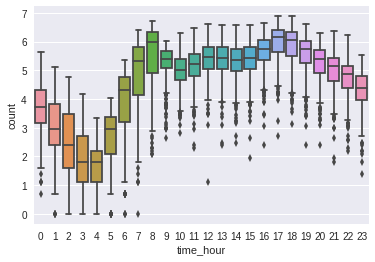

In [40]:
sns.boxplot(y=np.log(train_data['count']), x=train_data['time_hour'])

In [56]:
def extract_days(t):
    t = pd.to_datetime(t, format='%d-%m-%Y %H:%M:%S')
    return t.weekday()

In [61]:
train_data['day'] = train_data['datetime'].apply(extract_days)
test_data['day'] = test_data['datetime'].apply(extract_days)

In [62]:
train_data['day'].unique()

array([5, 6, 0, 1, 2, 3, 4])

In [63]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_hour,day
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [64]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time_hour,day
0,20-01-2011 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3
1,20-01-2011 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3
2,20-01-2011 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3
3,20-01-2011 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3
4,20-01-2011 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3


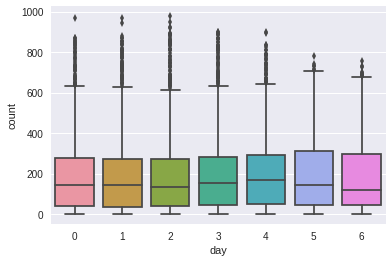

In [65]:
sns.boxplot(y=train_data['count'], x=train_data['day'])

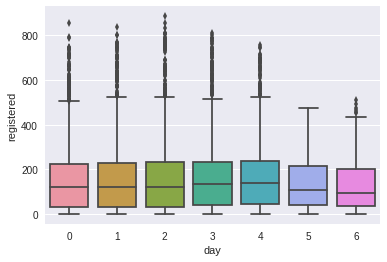

In [68]:
sns.boxplot(y=train_data['registered'], x=train_data['day'])

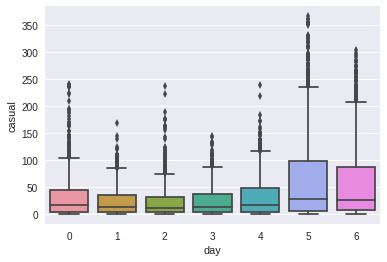

In [69]:
sns.boxplot(y=train_data['casual'], x=train_data['day'])

In [ ]:
def prepare_data(data, is_train):
    data['humidity'] /= 100

    season_dummies = pd.get_dummies(data['season'])
    season_dummies.columns = ['spring', 'summer', 'fall', 'winter']
    data = pd.concat([data, season_dummies], axis=1)

    weather_dummies = pd.get_dummies(data['weather'])
    weather_dummies.columns = ['clear', 'mist', 'rainy', 'snow']
    data = pd.concat([data, weather_dummies], axis=1)
    features = data.drop(['datetime', 'season', 'weather'], axis=1)
    
    if is_train:
        features = features.drop(['registered', 'casual', 'count'], axis=1)
        target = data['count']
        return features, target
    return features

In [ ]:
train_features, train_target = prepare_data(train_data, 1)

In [ ]:
test_features = prepare_data(test_data, 0)

In [ ]:
train_features.head()

In [ ]:
train_target.head()

In [ ]:
test_features.head()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_features, train_target, random_state=3)

In [ ]:
rf = RandomForestRegressor(n_estimators=200)

In [ ]:
rf.fit(X_train, Y_train)

In [ ]:
predicted = rf.predict(X_test)

In [ ]:
print rmsle(predicted, Y_test)